# Backtesting
---

In [16]:
import numpy as np
import pandas as pd

import FinanceDataReader as fdr
import datetime

cluster0  
<img width="1006" alt="image" src="https://user-images.githubusercontent.com/88031549/203972147-fc86531d-febd-41c7-922a-22e9648e4e88.png">

cluster3  
<img width="1033" alt="image" src="https://user-images.githubusercontent.com/88031549/203954456-ec3bd1bb-3e7f-498c-9c12-ab704fcebcb2.png">

cluster10  
<img width="991" alt="image" src="https://user-images.githubusercontent.com/88031549/203972417-10489cbd-f662-4f4c-9f0c-ada7e5aaecb4.png">

# 1. Data 불러오기

In [7]:
# 백테스팅 기간 : 2021.04.01 ~ 2022.03.31
start = datetime.datetime(2021, 4, 1)
end = datetime.datetime(2022, 3, 31)

df = fdr.DataReader("006650", start, end)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-01,327000,328000,317000,322000,47488,-0.010753
2021-04-02,326000,328000,320000,321500,41740,-0.001553
2021-04-05,323500,323500,304000,305000,130733,-0.051322
2021-04-06,305000,305500,292000,296000,123624,-0.029508
2021-04-07,297000,300500,292500,298500,52077,0.008446
...,...,...,...,...,...,...
2022-03-25,164000,164000,159000,160000,27135,-0.018405
2022-03-28,159500,162000,157500,160000,19745,0.000000
2022-03-29,161000,163500,161000,163000,23822,0.018750


# 2. Data check & plot

<AxesSubplot: xlabel='Date'>

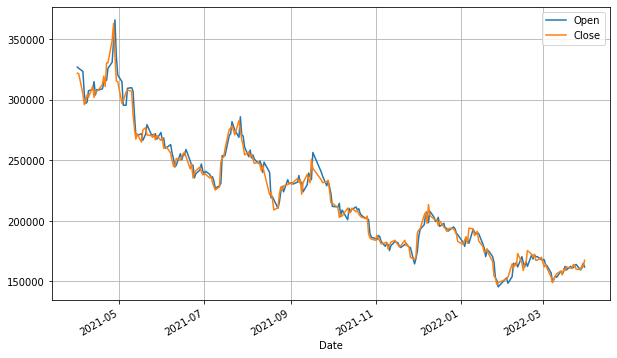

In [8]:
# 시가, 종가 확인
df.plot(y = ['Open', 'Close'], figsize = [10,6], grid = True)

<AxesSubplot: xlabel='Date'>

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserW

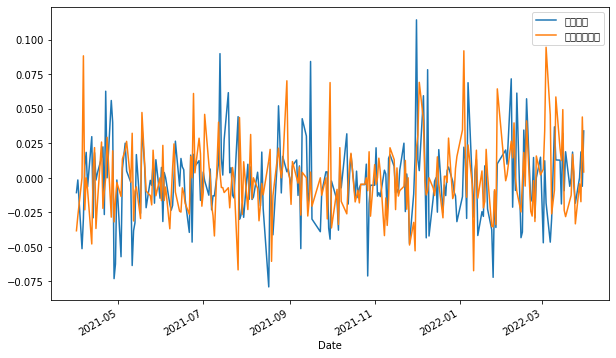

In [9]:
# 변동(change) 확인 : 대한유화, 삼일씨엔에스
df_1 = fdr.DataReader("006650", start, end)
df_2 = fdr.DataReader("004440", start, end)

df = pd.DataFrame()
df['대한유화'] = df_1['Change']
df['삼일씨엔에스'] = df_2['Change']

# df.tail(100).plot(figsize = [10, 6]) # 최근 100일
df.plot(figsize = [10, 6])

# 3. 장단기 이평선에 따른 수익률 계산

In [10]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2021.04.01 ~ 2022.03.31
    start = datetime.datetime(2021, 4, 1)
    end = datetime.datetime(2022, 3, 31)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

## 3-1. cluster0

In [13]:
list_cluster0 = ['226320', '149980', '002310', '081580', '109080', '009680', '100660', '067830', '008110', '066670']

dfs = list()
for i in list_cluster0:
    dfs.append(get_return_sl(i, 10 ,50))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-0.6870524114938085


,수익률,단기 이평,장기 이평
0,-11.804679,10,50
1,42.334743,10,50
2,-9.639451,10,50
3,-6.671244,10,50
4,49.949018,10,50
5,-22.246875,10,50
6,-33.320403,10,50
7,-6.960224,10,50
8,-15.932983,10,50
9,7.421573,10,50


## 3-2. cluster3

In [42]:
list_cluster3 = ['006650', '004440', '100130', '084010', '011500', '121440', '147760', '210540', '108320', '025540']

dfs = list()
for i in list_cluster3:
    dfs.append(get_return_sl(i, 10 ,50))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-8.938132947169704


,수익률,단기 이평,장기 이평
0,-14.557791,10,50
1,9.182599,10,50
2,-38.076389,10,50
3,-23.008123,10,50
4,-9.568654,10,50
5,-12.788155,10,50
6,-15.127726,10,50
7,7.168459,10,50
8,19.646190,10,50
9,-12.251740,10,50


## 3-3. cluster10

In [15]:
list_cluster10 = ['023800', '042600', '001230', '043260', '001120', '019490', '010060', '200880', '137400', '114810']

dfs = list()
for i in list_cluster10:
    dfs.append(get_return_sl(i, 10 ,50))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

4.37699659068355


,수익률,단기 이평,장기 이평
0,-15.522656,10,50
1,143.597738,10,50
2,-35.833406,10,50
3,-10.101588,10,50
4,4.531965,10,50
5,-67.144531,10,50
6,-9.081456,10,50
7,-35.791299,10,50
8,73.988375,10,50
9,-4.873177,10,50


## 3-4. 최적이평선 찾기

In [ ]:
# 최적이평선 찾기
dfs = []
for short in range(3, 11):
    for long in range(30, 61):
        df = get_return_sl('006650', short, long)
        dfs.append(df)

df_result = pd.concat(dfs)
df_result.sort_values(by = '수익률', ascending = False)

# 4. 최종 수익률

In [116]:
BH_list = [23.62,-0.98,14.84]
final = pd.DataFrame({"Buy&hold수익률(%)":[23.62,-0.98,14.84, (-0.98+23.62+14.84)/3], "이평선(10-50)수익률(%)":[-0.69,-8.94,4.38,(-8.94-0.69+4.38)/3], "이평선(10-60)수익률(%)":[-5.59,-12.97,7.74,(-5.59-12.97+7.74)/3]}, index=["cluster0","cluster3","cluster10","평균수익률"])
final

,Buy&hold수익률(%),이평선(10-50)수익률(%),이평선(10-60)수익률(%)
cluster0,23.620000,-0.69,-5.590000
cluster3,-0.980000,-8.94,-12.970000
cluster10,14.840000,4.38,7.740000
평균수익률,12.493333,-1.75,-3.606667


# 5. KOSPI200 수익률 비교

## 5-1. kospi200 수익률

In [118]:
# 백테스팅 기간 : 2021.04.01 ~ 2022.03.31
start = datetime.datetime(2021, 4, 1)
end = datetime.datetime(2022, 3, 31)

df_kospi200 = fdr.DataReader("KS200", start, end)
df_kospi200["KOSPI200_수익률"] = df_kospi200["Close"]/df_kospi200["Close"][0] - 1
df_kospi200["KOSPI200_수익률"] = df_kospi200["KOSPI200_수익률"]*100
df_kospi200

,Close,Open,High,Low,Volume,Change,KOSPI200_수익률
Date,,,,,,,
2021-04-01,419.42,416.99,419.78,416.51,184610000.0,0.0106,0.000000
2021-04-02,423.74,422.19,425.13,422.02,163070000.0,0.0103,1.029994
2021-04-05,424.85,425.15,426.31,422.16,157710000.0,0.0026,1.294645
2021-04-06,425.88,425.18,427.68,423.35,162960000.0,0.0024,1.540222
2021-04-07,426.70,426.22,428.38,424.96,176730000.0,0.0019,1.735730
...,...,...,...,...,...,...,...
2022-03-25,362.06,364.76,364.92,361.34,119070000.0,-0.0036,-13.676029
2022-03-28,362.06,360.63,363.25,358.70,136540000.0,0.0000,-13.676029
2022-03-29,363.77,364.18,365.56,362.27,132700000.0,0.0047,-13.268323


## 5-2. cluster0과 비교

<AxesSubplot: xlabel='Date'>

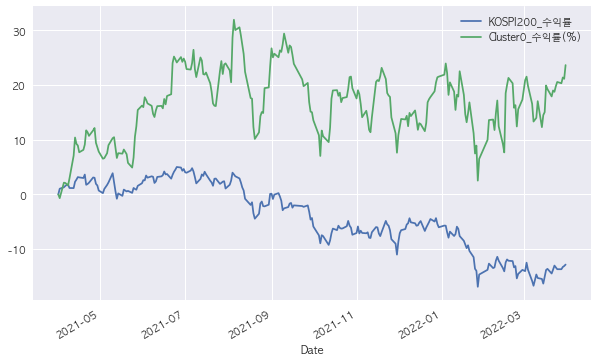

In [120]:
list_cluster0 = ['226320', '149980', '002310', '081580', '109080', '009680', '100660', '067830', '008110', '066670']
df_compare0 = pd.DataFrame()
for i in list_cluster0:
    df_compare0[i] = fdr.DataReader(i, start, end)["Close"]

for i in list_cluster0:
    df_compare0[i] = df_compare0[i]/df_compare0[i][0] - 1


df_compare0["Cluster0_수익률(%)"] = df_compare0[list_cluster0[0]]
for i in list_cluster0:
    df_compare0["Cluster0_수익률(%)"] = df_compare0[i] + df_compare0["Cluster0_수익률(%)"]
df_compare0["Cluster0_수익률(%)"] = df_compare0["Cluster0_수익률(%)"] - df_compare0[list_cluster0[0]]
df_compare0["Cluster0_수익률(%)"] = df_compare0["Cluster0_수익률(%)"]/10
df_compare0["Cluster0_수익률(%)"] = df_compare0["Cluster0_수익률(%)"]*100

df_plot0 = pd.concat([df_kospi200, df_compare0],axis=1)
df_plot0.plot(y = ["KOSPI200_수익률", "Cluster0_수익률(%)"], figsize = [10,6], grid = True)

## 5-3. cluster3과 비교

<AxesSubplot: xlabel='Date'>

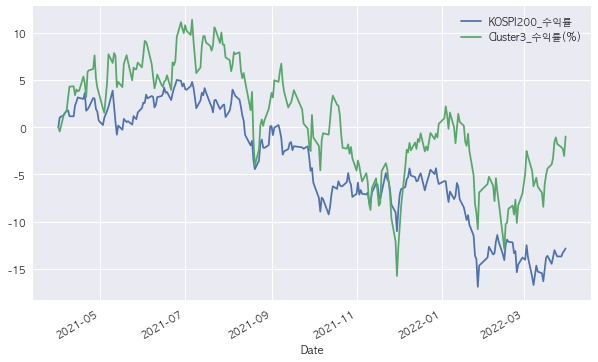

In [106]:
list_cluster3 = ['006650', '004440', '100130', '084010', '011500', '121440', '147760', '210540', '108320', '025540']
df_compare3 = pd.DataFrame()
for i in list_cluster3:
    df_compare3[i] = fdr.DataReader(i, start, end)["Close"]

for i in list_cluster3:
    df_compare3[i] = df_compare3[i]/df_compare3[i][0] - 1


df_compare3["Cluster3_수익률(%)"] = df_compare3[list_cluster3[0]]
for i in list_cluster3:
    df_compare3["Cluster3_수익률(%)"] = df_compare3[i] + df_compare3["Cluster3_수익률(%)"]
df_compare3["Cluster3_수익률(%)"] = df_compare3["Cluster3_수익률(%)"] - df_compare3[list_cluster3[0]]
df_compare3["Cluster3_수익률(%)"] = df_compare3["Cluster3_수익률(%)"]/10
df_compare3["Cluster3_수익률(%)"] = df_compare3["Cluster3_수익률(%)"]*100

df_plot3 = pd.concat([df_kospi200, df_compare3],axis=1)
df_plot3.plot(y = ["KOSPI200_수익률", "Cluster3_수익률(%)"], figsize = [10,6], grid = True)

## 5-4. cluster10과 비교

<AxesSubplot: xlabel='Date'>

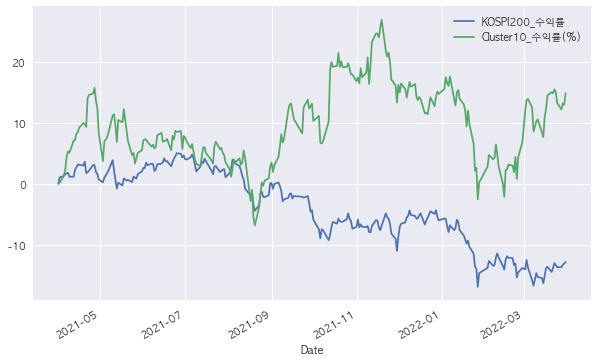

In [109]:
list_cluster10 = ['023800', '042600', '001230', '043260', '001120', '019490', '010060', '200880', '137400', '114810']
df_compare10 = pd.DataFrame()
for i in list_cluster10:
    df_compare10[i] = fdr.DataReader(i, start, end)["Close"]

for i in list_cluster10:
    df_compare10[i] = df_compare10[i]/df_compare10[i][0] - 1


df_compare10["Cluster10_수익률(%)"] = df_compare10[list_cluster10[0]]
for i in list_cluster10:
    df_compare10["Cluster10_수익률(%)"] = df_compare10[i] + df_compare10["Cluster10_수익률(%)"]
df_compare10["Cluster10_수익률(%)"] = df_compare10["Cluster10_수익률(%)"] - df_compare10[list_cluster10[0]]
df_compare10["Cluster10_수익률(%)"] = df_compare10["Cluster10_수익률(%)"]/10
df_compare10["Cluster10_수익률(%)"] = df_compare10["Cluster10_수익률(%)"]*100

df_plot10 = pd.concat([df_kospi200, df_compare10],axis=1)
df_plot10.plot(y = ["KOSPI200_수익률", "Cluster10_수익률(%)"], figsize = [10,6], grid = True)

## 5-5. 최종 수익률 plot

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_19833/3296271695.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='Date'>

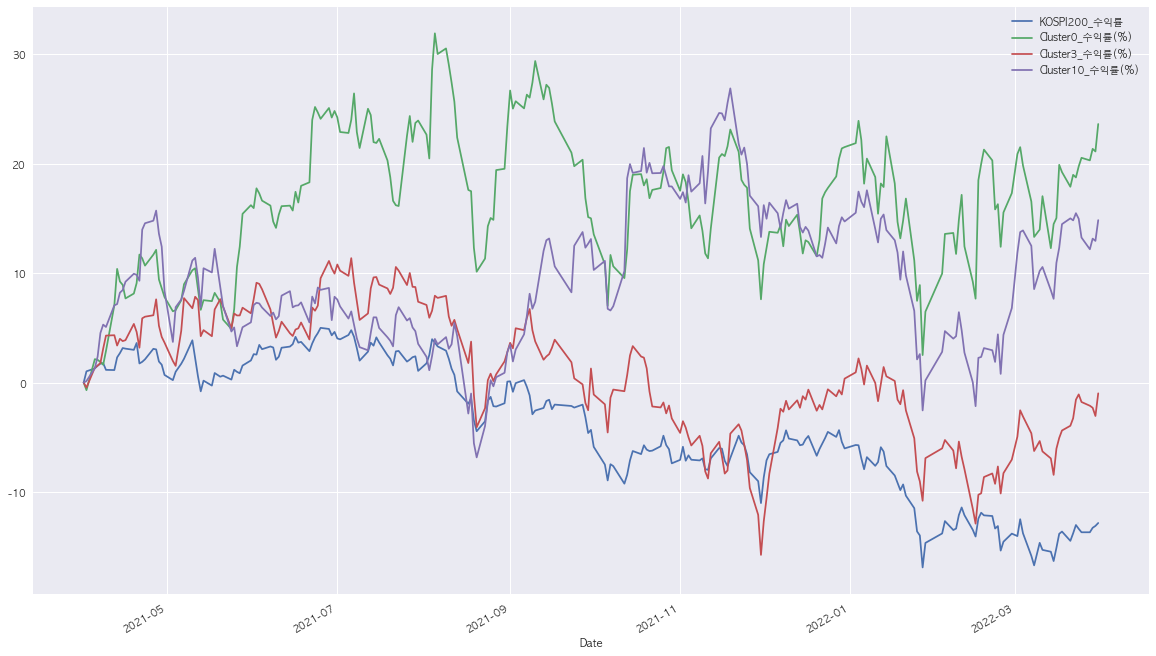

In [72]:
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_plot_total = pd.concat([df_kospi200, df_compare0, df_compare3, df_compare10], axis=1)
df_plot_total.plot(y = ["KOSPI200_수익률", "Cluster0_수익률(%)", "Cluster3_수익률(%)", "Cluster10_수익률(%)"], figsize = [20,12], grid = True)

# 6. MDD & SHARP & SORTINO

In [170]:
MDD_list = []
def DD(data):
    data["전고점"] = data["sum"].cummax()
    data["DD"] = (1-data["sum"]/data["전고점"])*100
    MDD = data["DD"].max()
    return MDD

VOL_list = []
SHARP_list = []
SORTINO_list = []
def replace_0(x):
    if x > 0 :
        return 0
    else:
        return x

kospi200

In [171]:
start = datetime.datetime(2021, 4, 1)
end = datetime.datetime(2022, 3, 31)

df_kospi200 = fdr.DataReader("KS200", start, end)
df_kospi200.columns = ['sum', 'Open', 'High', 'Low', 'Volume', 'Change']

MDD_list.append(round(DD(df_kospi200),2))


df_kospi200["전날대비수익률"] = (df_kospi200["sum"] - df_kospi200["sum"].shift(1))/df_kospi200["sum"]
VOL = np.std(df_kospi200["전날대비수익률"]) * np.sqrt(len(df_kospi200["전날대비수익률"]))
SHARP = (-0.1282 - 0.00693)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)

df_kospi200["소티노하락"] = df_kospi200["전날대비수익률"].map(replace_0)
VOL = np.std(df_kospi200["소티노하락"]) * np.sqrt(len(df_kospi200["소티노하락"]))
SORTINO = (-0.1282 - 0.00693)/VOL
SORTINO_list.append(SORTINO)


print("DD = ", DD(df_kospi200))
print("VOL = ", VOL)
print("SHARP = ", SHARP)
print("SORTINO = ", SORTINO)

DD =  20.849227974568574
VOL =  0.09710558114291123
SHARP =  -0.8765803854832488
SORTINO =  -1.3915780989058482


cluster0

In [172]:
list_cluster0 = ['226320', '149980', '002310', '081580', '109080', '009680', '100660', '067830', '008110', '066670']
df_compare0 = pd.DataFrame()
for i in list_cluster0:
    df_compare0[i] = fdr.DataReader(i, start, end)["Close"]

df_compare0["sum"] = df_compare0[list_cluster0[0]]
for i in list_cluster0:
    df_compare0["sum"] = df_compare0[i] + df_compare0["sum"]
df_compare0["sum"] = df_compare0["sum"] - df_compare0[list_cluster0[0]]

MDD_list.append(round(DD(df_compare0),2))


df_compare0["전날대비수익률"] = (df_compare0["sum"] - df_compare0["sum"].shift(1))/df_compare0["sum"]
VOL = np.std(df_compare0["전날대비수익률"]) * np.sqrt(len(df_compare0["전날대비수익률"]))
SHARP = (0.2362 - 0.00693)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)

df_compare0["소티노하락"] = df_compare0["전날대비수익률"].map(replace_0)
VOL = np.std(df_compare0["소티노하락"]) * np.sqrt(len(df_compare0["소티노하락"]))
SORTINO = (0.2362 - 0.00693)/VOL
SORTINO_list.append(SORTINO)

print("DD = ", DD(df_compare0))
print("VOL = ", VOL)
print("SHARP = ", SHARP)
print("SORTINO = ", SORTINO)


DD =  25.016054456717185
VOL =  0.1658749096064551
SHARP =  0.8276501877411263
SORTINO =  1.3821861337796797


cluster3

In [173]:
list_cluster3 = ['006650', '004440', '100130', '084010', '011500', '121440', '147760', '210540', '108320', '025540']
df_compare3 = pd.DataFrame()
for i in list_cluster3:
    df_compare3[i] = fdr.DataReader(i, start, end)["Close"]

df_compare3["sum"] = df_compare3[list_cluster3[0]]
for i in list_cluster3:
    df_compare3["sum"] = df_compare3[i] + df_compare3["sum"]
df_compare3["sum"] = df_compare3["sum"] - df_compare3[list_cluster3[0]]

MDD_list.append(round(DD(df_compare3),2))



df_compare3["전날대비수익률"] = (df_compare3["sum"] - df_compare3["sum"].shift(1))/df_compare3["sum"]
VOL = np.std(df_compare3["전날대비수익률"]) * np.sqrt(len(df_compare3["전날대비수익률"]))
SHARP = (-0.0098 - 0.00693)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)

df_compare3["소티노하락"] = df_compare3["전날대비수익률"].map(replace_0)
VOL = np.std(df_compare3["소티노하락"]) * np.sqrt(len(df_compare3["소티노하락"]))
SORTINO = (-0.0098 - 0.00693)/VOL
SORTINO_list.append(SORTINO)

print("DD = ", DD(df_compare3))
print("VOL = ", VOL)
print("SHARP = ", SHARP)
print("SORTINO = ", SORTINO)

DD =  35.876930349826665
VOL =  0.17297125339831118
SHARP =  -0.057553396953944465
SORTINO =  -0.09672127403433238


cluster10

In [174]:
list_cluster10 = ['023800', '042600', '001230', '043260', '001120', '019490', '010060', '200880', '137400', '114810']
df_compare10 = pd.DataFrame()
for i in list_cluster10:
    df_compare10[i] = fdr.DataReader(i, start, end)["Close"]

df_compare10["sum"] = df_compare10[list_cluster10[0]]
for i in list_cluster10:
    df_compare10["sum"] = df_compare10[i] + df_compare10["sum"]
df_compare10["sum"] = df_compare10["sum"] - df_compare10[list_cluster10[0]]

MDD_list.append(round(DD(df_compare10),2))


df_compare10["전날대비수익률"] = (df_compare10["sum"] - df_compare10["sum"].shift(1))/df_compare10["sum"]
VOL = np.std(df_compare10["전날대비수익률"]) * np.sqrt(len(df_compare10["전날대비수익률"]))
SHARP = (0.1484 - 0.00693)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)

df_compare10["소티노하락"] = df_compare10["전날대비수익률"].map(replace_0)
VOL2 = np.std(df_compare10["소티노하락"]) * np.sqrt(len(df_compare10["소티노하락"]))
SORTINO = (0.1484 - 0.00693)/VOL2
SORTINO_list.append(SORTINO)

print("DD = ", DD(df_compare10))
print("VOL = ", VOL)
print("VOL2 = ", VOL2)
print("SHARP = ", SHARP)
print("SORTINO = ", SORTINO)

DD =  29.164014947536753
VOL =  0.3072177388366955
VOL2 =  0.18343179909987323
SHARP =  0.46048773269306476
SORTINO =  0.7712403230749199


MDD & SHARP & SORTINO 정리
- 샤프 지수 = 변동성(좋은+나쁜) 대비 수익의 정도
- 소르티노 지수 = 변동성(나쁜) 대비 수익의 정도


In [175]:
BH_list = [-12.82, 23.62,-0.98,14.84]
final = pd.DataFrame({"Buy&hold수익률(%)":BH_list, "MDD":MDD_list, "SHARP":SHARP_list, "SORTINO":SORTINO_list}, index=["KOSPI200","cluster0","cluster3","cluster10"])
final

,Buy&hold수익률(%),MDD,SHARP,SORTINO
KOSPI200,-12.82,20.85,-0.876580,-1.391578
cluster0,23.62,25.02,0.827650,1.382186
cluster3,-0.98,35.88,-0.057553,-0.096721
cluster10,14.84,29.16,0.460488,0.771240


끝!